In [1]:
%cd ..

/Users/ivallesp/PycharmProjects/somnium


In [2]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from somnium.core import SOM
from somnium.visualization import plot_components, plot_bmus
from somnium.visualization import plot_umatrix

In [3]:
df = (pd.DataFrame({"weight": np.random.randn(10000)*8+75,
                    "height": np.random.randn(10000)*8+180})
      .assign(BMI=lambda d: 703*d.weight/(d.height**2),
              fat=lambda d: ((d.weight-75)/8)*2 + 23.5 +
              np.random.randn(10000)*3,
              random=10+np.random.randn(10000)
              ))

data = df.values
names = df.columns

In [4]:
df.head()

,weight,height,BMI,fat,random
0,67.300230,175.864210,1.529738,19.842091,8.933429
1,82.986496,194.213735,1.546689,18.231959,10.026852
2,69.478311,180.050017,1.506670,22.662522,9.005999
3,67.220260,172.299257,1.591801,28.347419,10.071569
4,66.320276,187.515778,1.325947,22.009188,10.755759


E_Quantization = 0.3941004807842578
E_Topographic = 0.0736


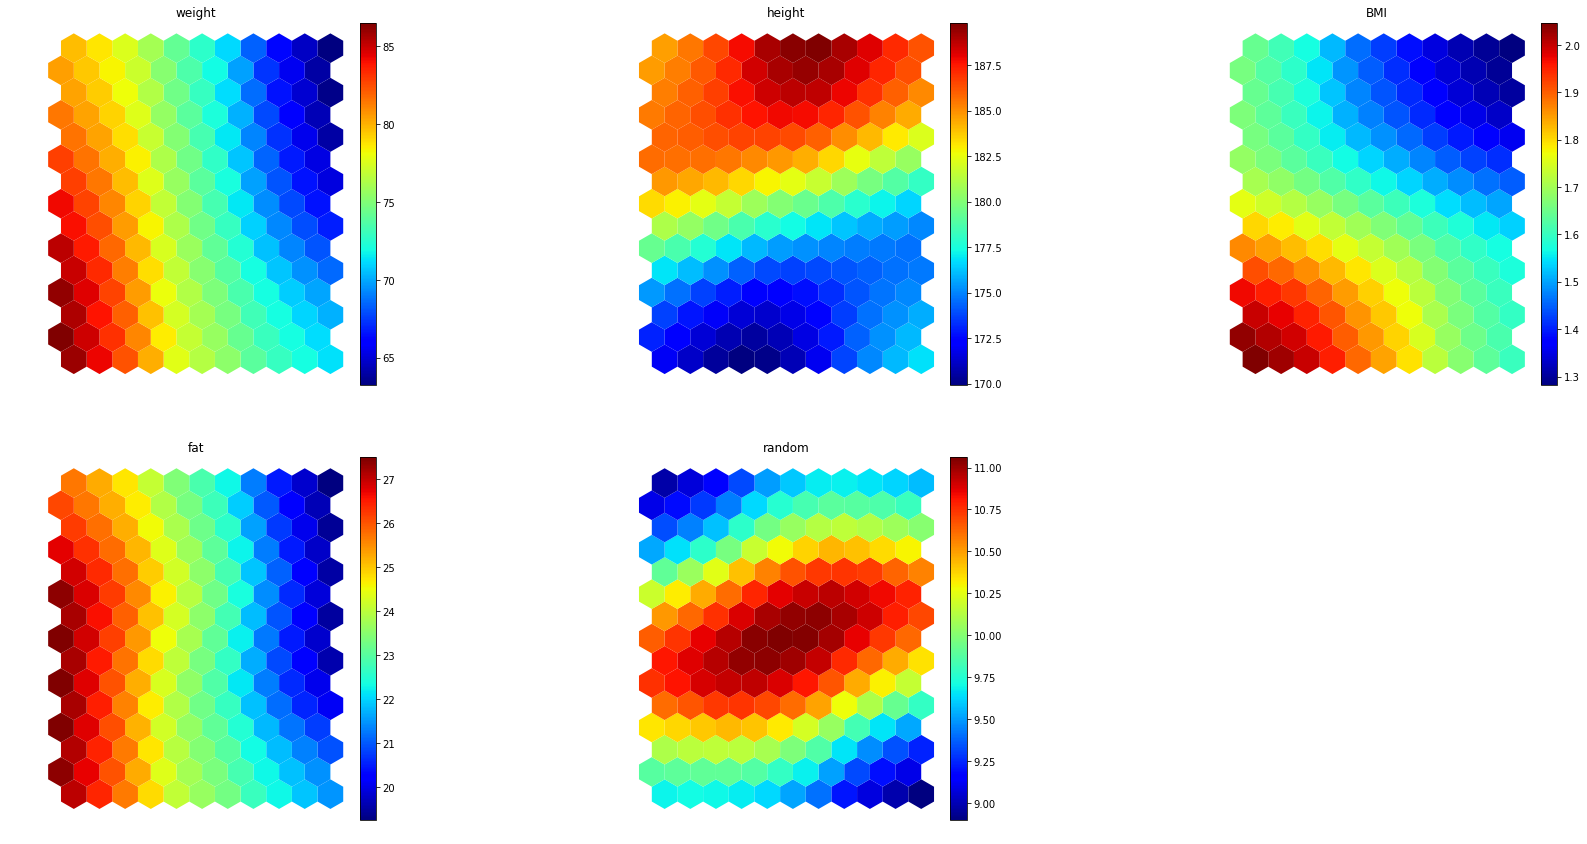

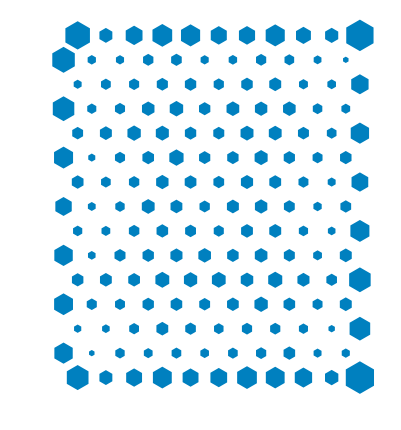

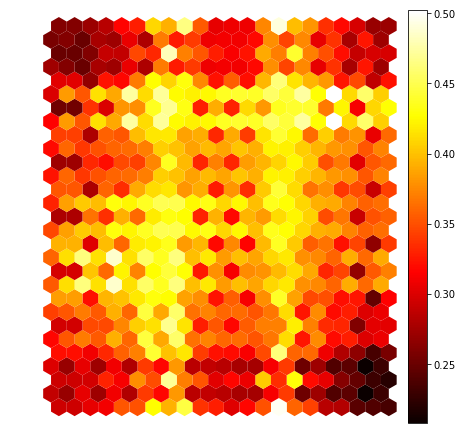

In [7]:
model = SOM(lattice="hexa", normalization="standard", distance_metric="euclidean", neighborhood="epanechicov", mapsize=[15, 11], n_jobs=1)

model.fit(data, 10, 30, 10)
model.fit(data, 30, 10, 4)
print("E_Quantization =", model.calculate_quantization_error())

print("E_Topographic =", model.calculate_topographic_error())

plot_components(model, names, figure_width=30, max_subplot_columns=3)
plot_bmus(model, figure_width=10)
plot_umatrix(model, colormap = plt.cm.hot, figure_width=10)

E_Quantization = 0.4045409969399897
E_Topographic = 0.03059999999999996


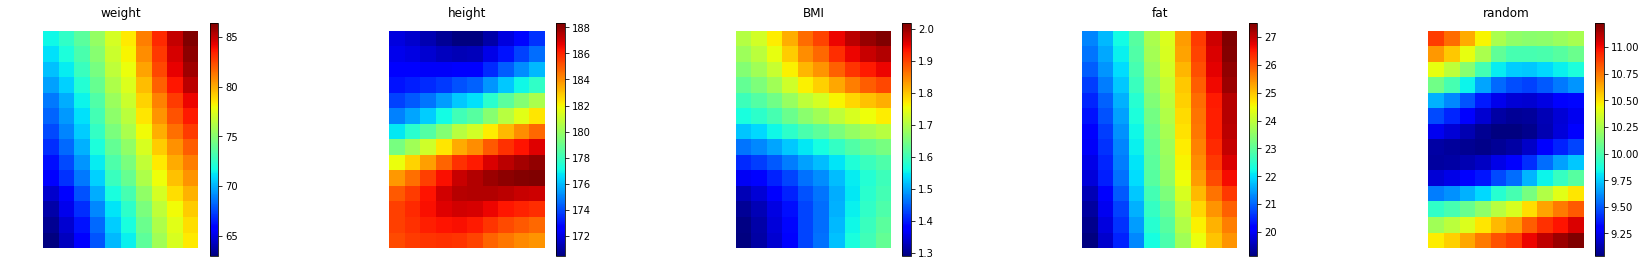

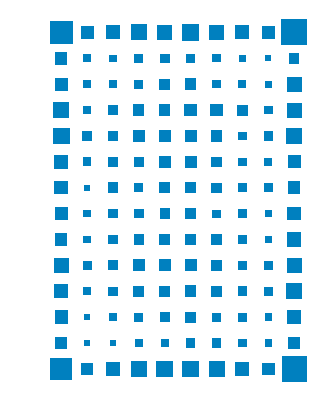

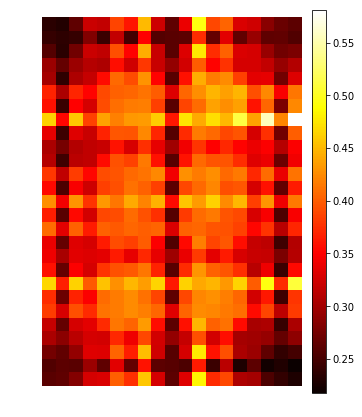

In [6]:
model = SOM(lattice="rect", distance_metric="euclidean", neighborhood="epanechicov", mapsize=[14, 10])

model.fit(data, 10, 30, 10)
model.fit(data, 10, 10, 4)
print("E_Quantization =", model.calculate_quantization_error())

print("E_Topographic =", model.calculate_topographic_error())

plot_components(model=model, names=names, figure_width=30, max_subplot_columns=5)
plot_bmus(model, figure_width=10)
plot_umatrix(model=model, colormap = plt.cm.hot, figure_width=10)